In [1]:
# I noticed on some of Ian's images that the lattice wasn't being completely masked.
# I suspect the reason is the search is missing those points because we aren't extending the grid to cover
# The whole image.

# OR

# The problem could be that I am not completely masking a point.

In [2]:
# I need a way to look at the power spectrum of an image after subtraction. Let's pick an example and take
# it to that point.

# Copy/paste some parameters from mask_pbsapo_micrographs.ipynb

In [4]:
import saxtal_functions as sax
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm, trange
import os
from funcs_mrcio import iwrhdr_opened, irdhdr_opened, iwrsec_opened, irdsec_opened
from itertools import product

In [5]:
threshold_method='sd' 
pixel_size = 1.048
verbose=True
show_plots=True
threads=16
sigma=9
num_sd=5
num_sd_secondpass=2
x_window_percent=(0.01, 0.95)
y_window_percent=(0, 1)
miller_index_buffer=10
box_radius=10
min_lattice_size=8
epsilon=0.0707
mask_hotpixels=False
mask_radius=5
replace_angle=10
return_spots=False
return_stats=False
return_image=False

filename = 'test_data/test_lattice.mrc'
filename_out = 'test_data/test_lattice_masked.mrc'

scipy_fft(): FFT performed in 150.84 milliseconds.
0 29 5760 2737
[-1.1127068e-05] [0.18990539]
Number of first-pass spots found: 289


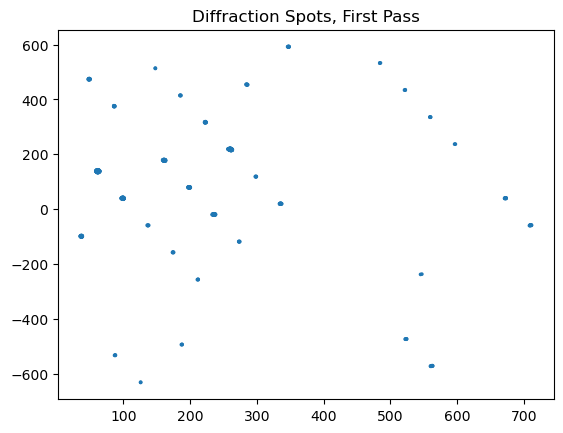

Starting basis: [[139  40]
 [ 62  99]]
Starting basis size: 34566
------------------------------------
Running basis shortening...
The angle between the basis vectors is: 43.96036738400097
[139  62] is larger than [40 99]
The updated basis vectors are [ 99 -37][40 99]
This run resulted in a basis smaller than the last: 22571
The updated basis vectors are: [[-99  40]
 [ 37  99]]
------------------------------------
Running basis shortening...
The angle between the basis vectors is: 91.50810358067031
[40 99] is larger than [-99  37]
The updated basis vectors are [-59 136][-99  37]
This run resulted in a basis larger than the last: 33147
Terminating loop.
------------------------------------


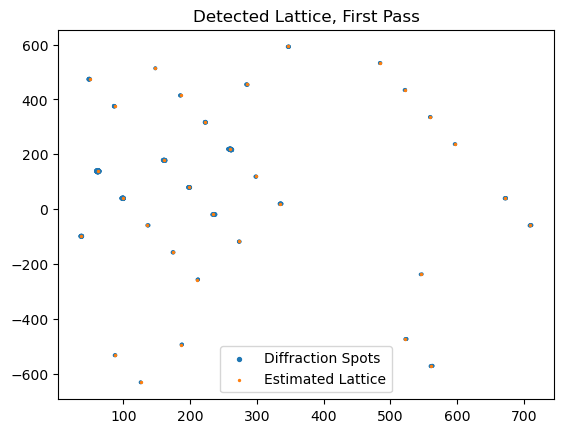

Starting basis: [[-99  40]
 [ 37  99]]
Refined_basis: [[-98.8083128   39.60634007]
 [ 37.35068683  99.31414324]]
Unit cell dimensions (A): 57.15 56.46
Highest resolution spot (A): 7.53


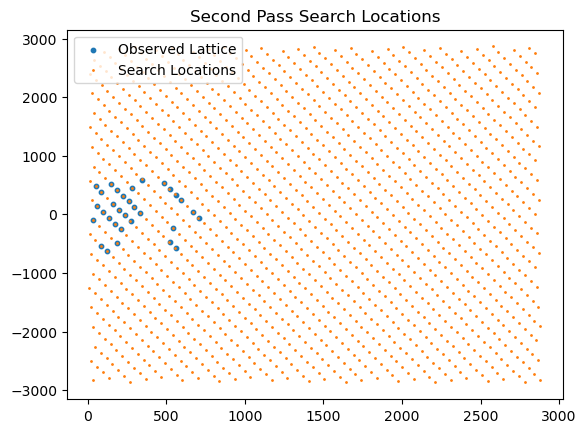

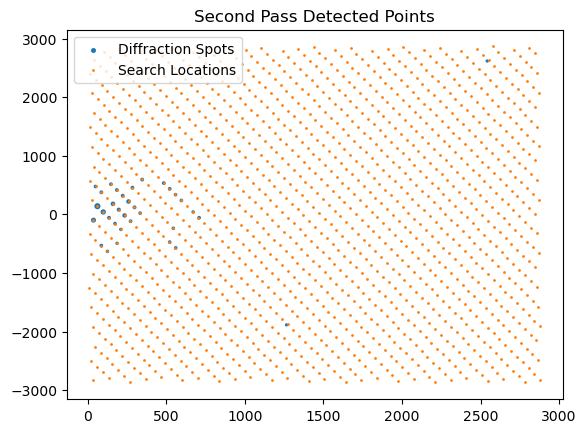

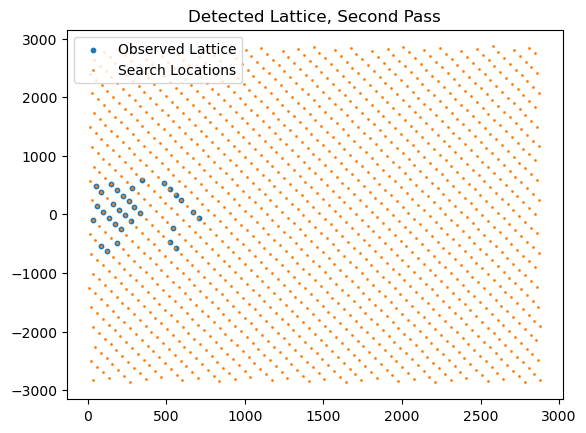

Highest resolution spot from second pass (A): 7.53
[[5222   82]
 [5222   83]
 [5222   84]
 ...
 [5707  712]
 [5707  713]
 [5707  714]]
unwrap
[[-538   82]
 [-538   83]
 [-538   84]
 ...
 [ -53  712]
 [ -53  713]
 [ -53  714]]
-538
not hi
-538
not hi
-538
not hi
-538
not hi
-538
not hi
-538
not hi
-538
not hi
-538
not hi
-538
not hi
-538
not hi
-538
not hi
-537
not hi
-537
not hi
-537
not hi
-537
not hi
-537
not hi
-537
not hi
-537
not hi
-537
not hi
-537
not hi
-537
not hi
-537
not hi
-536
not hi
-536
not hi
-536
not hi
-536
not hi
-536
not hi
-536
not hi
-536
not hi
-536
not hi
-536
not hi
-536
not hi
-536
not hi
-535
not hi
-535
not hi
-535
not hi
-535
not hi
-535
not hi
-535
not hi
-535
not hi
-535
not hi
-535
not hi
-535
not hi
-535
not hi
-534
not hi
-534
not hi
-534
not hi
-534
not hi
-534
not hi
-534
not hi
-534
not hi
-534
not hi
-534
not hi
-534
not hi
-534
not hi
-533
not hi
-533
not hi
-533
not hi
-533
not hi
-533
not hi
-533
not hi
-533
not hi
-533
not hi
-533
not hi
-533
n

hi
432
hi
432
hi
432
hi
432
hi
433
hi
433
hi
433
hi
433
hi
433
hi
433
hi
433
hi
433
hi
433
hi
433
hi
433
hi
434
hi
434
hi
434
hi
434
hi
434
hi
434
hi
434
hi
434
hi
434
hi
434
hi
434
hi
435
hi
435
hi
435
hi
435
hi
435
hi
435
hi
435
hi
435
hi
435
hi
435
hi
435
hi
436
hi
436
hi
436
hi
436
hi
436
hi
436
hi
436
hi
436
hi
436
hi
436
hi
436
hi
437
hi
437
hi
437
hi
437
hi
437
hi
437
hi
437
hi
437
hi
437
hi
437
hi
437
hi
438
hi
438
hi
438
hi
438
hi
438
hi
438
hi
438
hi
438
hi
438
hi
438
hi
438
hi
439
hi
439
hi
439
hi
439
hi
439
hi
439
hi
439
hi
439
hi
439
hi
439
hi
439
hi
440
hi
440
hi
440
hi
440
hi
440
hi
440
hi
440
hi
440
hi
440
hi
440
hi
440
hi
331
hi
331
hi
331
hi
331
hi
331
hi
331
hi
331
hi
331
hi
331
hi
331
hi
331
hi
332
hi
332
hi
332
hi
332
hi
332
hi
332
hi
332
hi
332
hi
332
hi
332
hi
332
hi
333
hi
333
hi
333
hi
333
hi
333
hi
333
hi
333
hi
333
hi
333
hi
333
hi
333
hi
334
hi
334
hi
334
hi
334
hi
334
hi
334
hi
334
hi
334
hi
334
hi
334
hi
334
hi
335
hi
335
hi
335
hi
335
hi
335
hi
335
hi
335

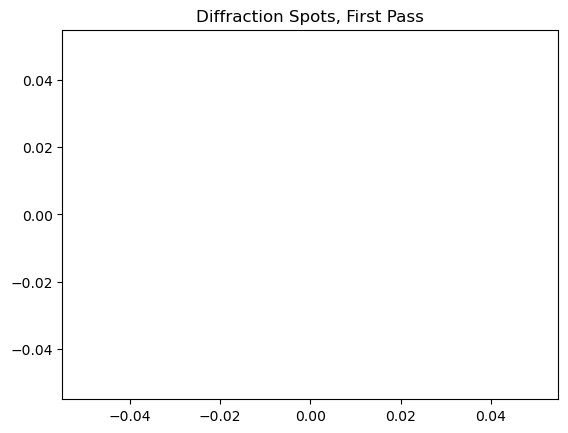

Lattice has less than 8 candidate basis vectors during first pass. Terminating function.


In [6]:
masked_fft = sax.mask_image(filename,
               filename_out,
               threshold_method = threshold_method,
               pixel_size = pixel_size,
               verbose = verbose,
               show_plots = show_plots,
               threads = threads,
               sigma = sigma,
               num_sd = num_sd,
               num_sd_secondpass = num_sd_secondpass,
               x_window_percent = x_window_percent,
               y_window_percent = y_window_percent,
               miller_index_buffer = miller_index_buffer,
               box_radius = box_radius,
               min_lattice_size = min_lattice_size,
               mask_radius= mask_radius,
               replace_angle = replace_angle,
               epsilon = epsilon,
               return_spots = False,
               return_stats = False,
               return_fft = True,
               return_image = False)

In [ ]:
# Import the image
image, header = sax.import_mrc(filename)

# Perform an FFT of the image
padded_fft = sax.scipy_fft(image, verbose, threads)

# Subtract the FFT from a Gaussian-smoothed FFT
log_diff_spectrum, smoothed_spectrum = sax.generate_diff_spectrum(padded_fft, sigma)

# Find diffraction spots
if threshold_method == "quantile":
    diffraction_indices, diffraction_amplitudes = sax.find_diffraction_spots_quantile(log_diff_spectrum, quantile, x_window_percent, y_window_percent)
if threshold_method == "sd":
    diffraction_indices, diffraction_amplitudes = sax.find_diffraction_spots_sd(log_diff_spectrum, num_sd, x_window_percent, y_window_percent)

# Return some info if function is verbose
if verbose:
    print("Number of first-pass spots found: " + str(diffraction_indices.shape[1]))

In [9]:
diffraction_indices[0]

array([ 591,  591,  592,  592,  592,  593,  593,  620,  621,  739,  761,
        850,  851,  923,  957,  960, 1015, 1054, 1055, 1090, 1134, 1149,
       1150, 1199, 1200, 1211, 1212, 1226, 1231, 1238, 1273, 1293, 1294,
       1299, 1313, 1314, 1328, 1329, 1330, 1343, 1344, 1378, 1379, 1380,
       1399, 1406, 1407, 1408, 1409, 1410, 1434, 1435, 1439, 1440, 1461,
       1471, 1472, 1506, 1507, 1537, 1548, 1549, 1562, 1563, 1577, 1578,
       1583, 1596, 1597, 1637, 1681, 1685, 1686, 1686, 1701, 1710, 1720,
       1733, 1738, 1779, 1780, 1781, 1789, 1790, 1839, 1840, 1840, 1841,
       1842, 1862, 1890, 1915, 1916, 1930, 1931, 1931, 1932, 1948, 1992,
       2012, 2013, 2030, 2031, 2032, 2033, 2039, 2040, 2058, 2059, 2121,
       2122, 2127, 2141, 2172, 2173, 2194, 2195, 2217, 2231, 2232, 2249,
       2250, 2251, 2286, 2287, 2288, 2291, 2309, 2310, 2355, 2398, 2399,
       2399, 2400, 2400, 2401, 2421, 2422, 2422, 2423, 2423, 2424, 2425,
       2498, 2499, 2511, 2512, 2513, 2514, 2537, 25

<Figure size 6000x6000 with 0 Axes>

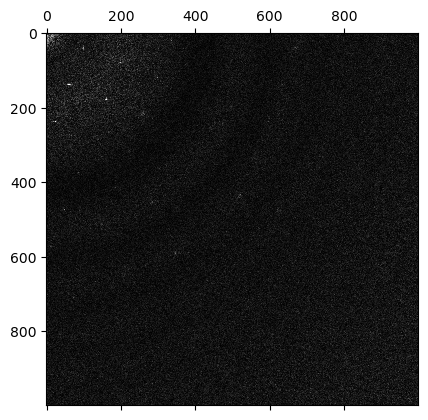

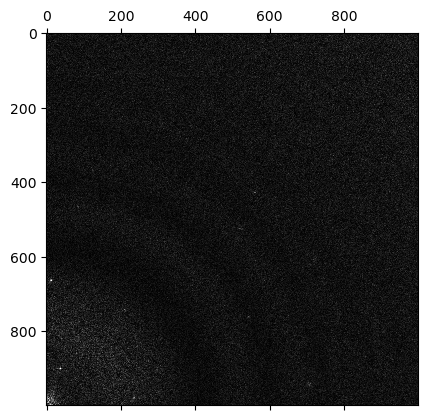

In [29]:
from matplotlib.pyplot import figure
figure(figsize=(20, 20), dpi=300)
# Display the unmasked power spectrum



plt.matshow(np.abs(padded_fft)[0:1000, 0:1000],
           cmap = "Greys_r",
           vmax = 7000,
           vmin = 0)

plt.matshow(np.abs(padded_fft)[-1000:, :1000],
           cmap = "Greys_r",
           vmax = 7000,
           vmin = 0)

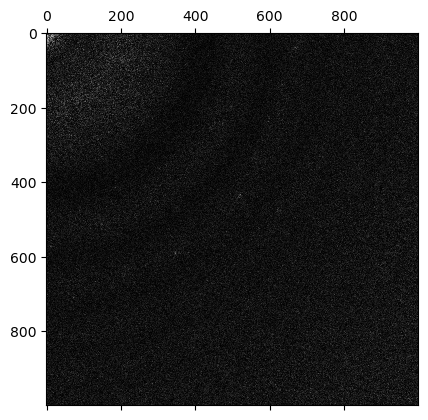

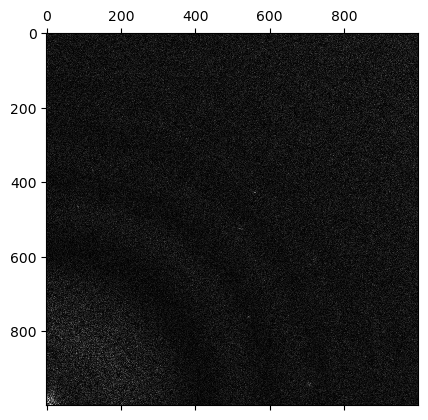

In [28]:
# Display the masked power spectrum

plt.matshow(np.abs(masked_fft)[:1000, :1000],
           cmap = "Greys_r",
           vmax = 7000,
           vmin = 0)

plt.matshow(np.abs(masked_fft)[-1000:, :1000],
           cmap = "Greys_r",
           vmax = 7000,
           vmin = 0)

scipy_fft(): FFT performed in 139.41 milliseconds.
Number of first-pass spots found: 264


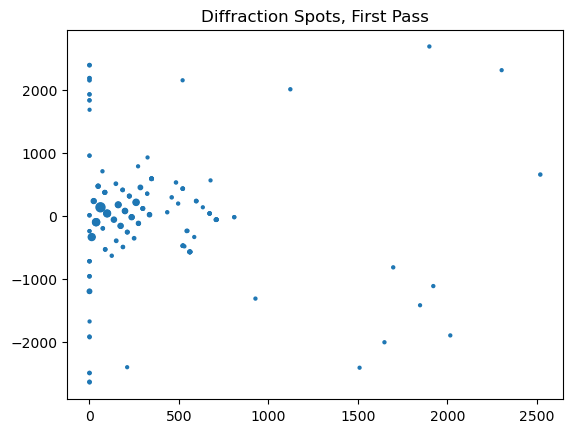

Starting basis: [[138 -99]
 [ 62  37]]
Starting basis size: 34058
------------------------------------
Running basis shortening...
The angle between the basis vectors is: 135.31419624284092
[138  62] is larger than [-99  37]
The updated basis vectors are [39 99][-99  37]
This run resulted in a basis smaller than the last: 22492
The updated basis vectors are: [[ 39 -99]
 [ 99  37]]
------------------------------------
Running basis shortening...
The angle between the basis vectors is: 91.00883955417763
[39 99] is larger than [-99  37]
The updated basis vectors are [-60 136][-99  37]
This run resulted in a basis larger than the last: 33266
Terminating loop.
------------------------------------


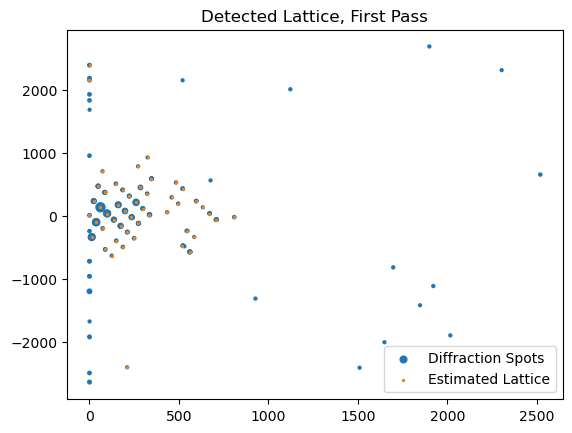

Starting basis: [[ 39 -99]
 [ 99  37]]
Refined_basis: [[ 39.49740693 -98.91192062]
 [ 99.25491276  37.15001978]]
Unit cell dimensions (A): 56.51 57.13
Highest resolution spot (A): 2.5


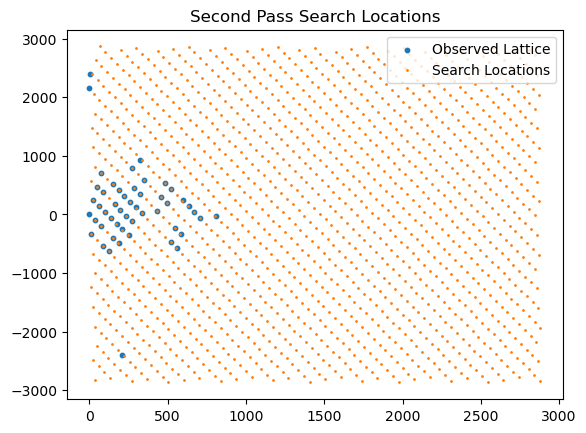

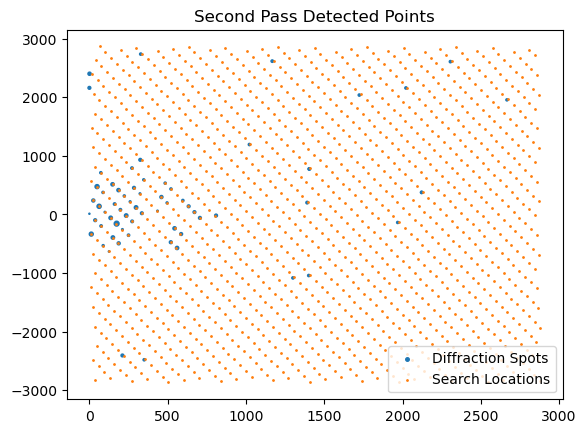

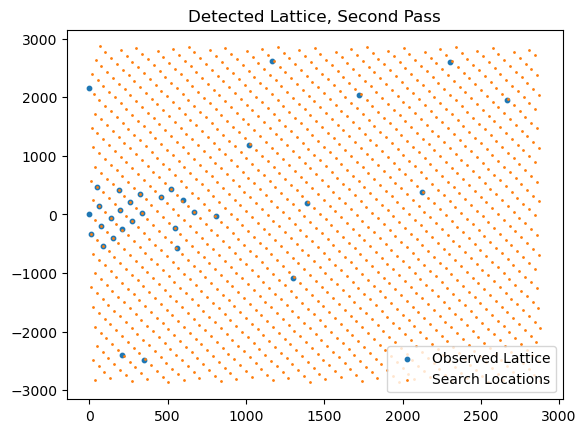

Highest resolution spot from second pass (A): 1.73


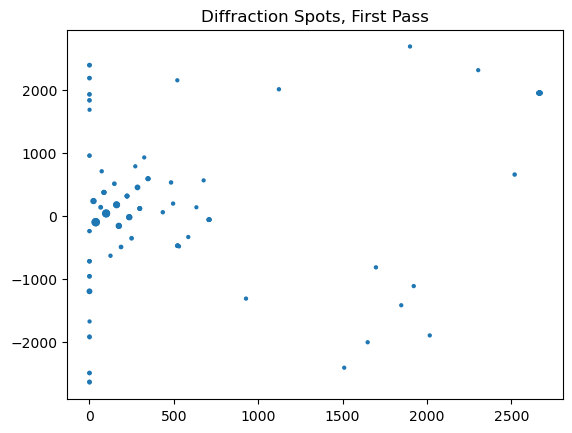

Starting basis: [[-99  40]
 [ 37  99]]
Starting basis size: 22571
------------------------------------
Running basis shortening...
The angle between the basis vectors is: 91.50810358067031
[40 99] is larger than [-99  37]
The updated basis vectors are [-59 136][-99  37]
This run resulted in a basis larger than the last: 33147
Terminating loop.
------------------------------------


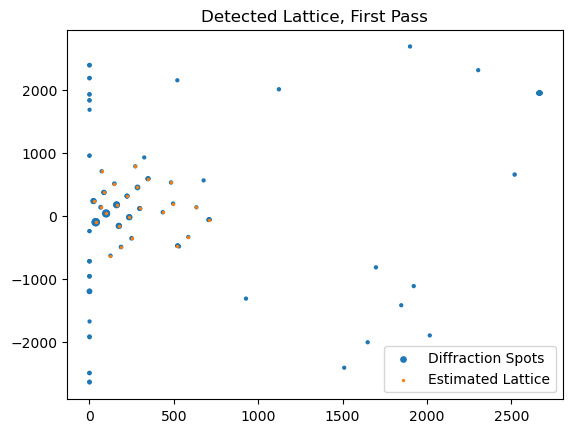

Starting basis: [[-99  40]
 [ 37  99]]
Refined_basis: [[-98.80683002  39.49454772]
 [ 37.35698981  99.28252517]]
Unit cell dimensions (A): 57.15 56.5
Highest resolution spot (A): 7.22


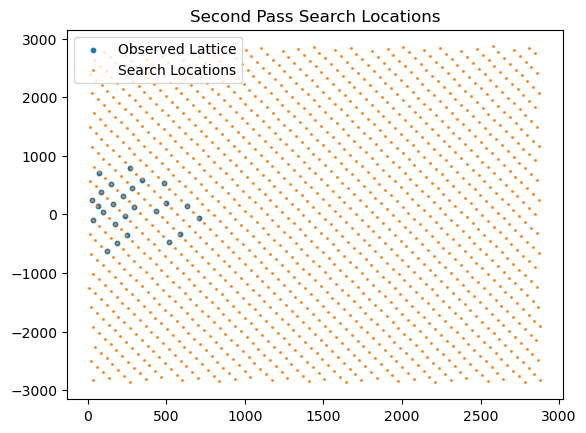

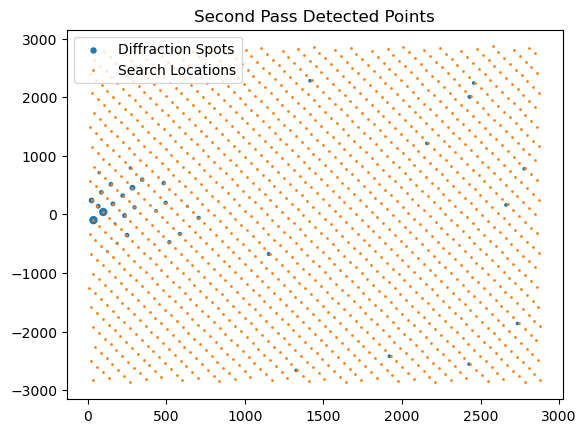

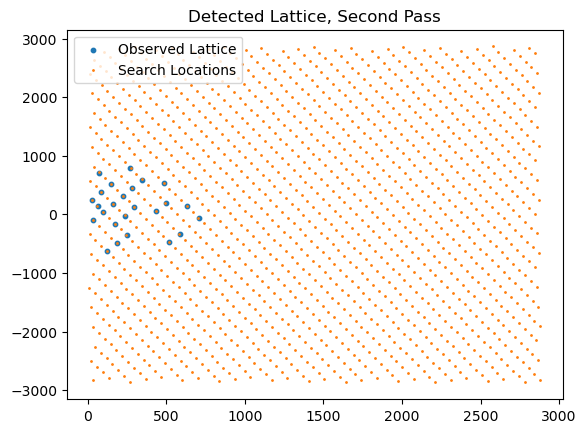

Highest resolution spot from second pass (A): 7.22


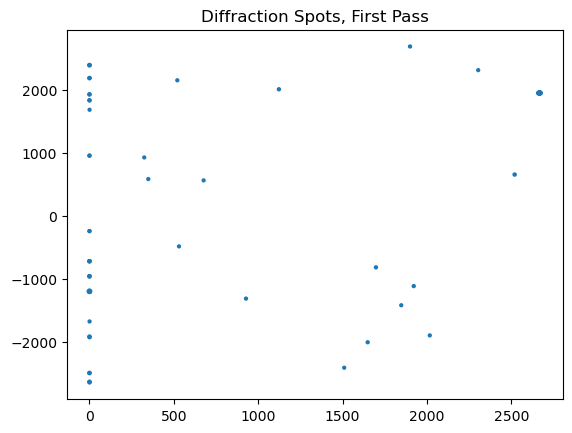

Starting basis: [[-1200  1959]
 [    0  2672]]
Starting basis size: 12417265
------------------------------------
Running basis shortening...
The angle between the basis vectors is: 53.75267008281623
[1959 2672] is larger than [1200    0]
The updated basis vectors are [ 759 2672][1200    0]
This run resulted in a basis smaller than the last: 9155665
The updated basis vectors are: [[  759 -1200]
 [ 2672     0]]
------------------------------------
Running basis shortening...
The angle between the basis vectors is: 74.14243753659824
[ 759 2672] is larger than [1200    0]
The updated basis vectors are [-441 2672][1200    0]
This run resulted in a basis smaller than the last: 8774065
The updated basis vectors are: [[ -441 -1200]
 [ 2672     0]]
------------------------------------
Running basis shortening...
The angle between the basis vectors is: 99.37189004446562
[-441 2672] is larger than [1200    0]
The updated basis vectors are [ 759 2672][1200    0]
This run resulted in a basis large

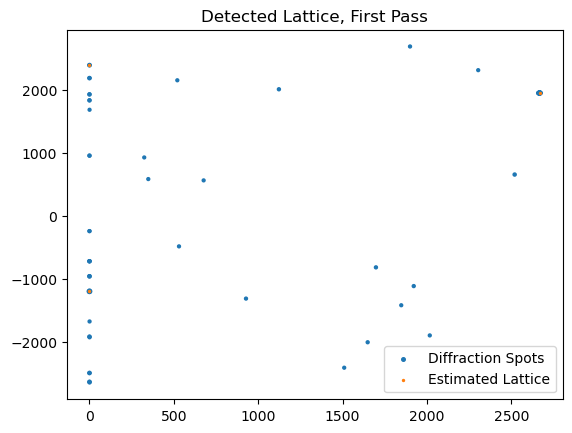

Starting basis: [[ -441 -1200]
 [ 2672     0]]
Refined_basis: [[ -441. -1200.]
 [ 2672.     0.]]
Unit cell dimensions (A): 2.23 5.03
Lattice unit cell min dimension is 2.23 Angstrom. Terminating function.
scipy_ifft(): iFFT performed in 132.21 milliseconds.
Export complete!
test_data/test_lattice.mrc masked successfully!


In [9]:
sax.mask_image(filename,
               filename_out,
               threshold_method = threshold_method,
               pixel_size = pixel_size,
               verbose = verbose,
               show_plots = show_plots,
               threads = threads,
               sigma = sigma,
               num_sd = num_sd,
               num_sd_secondpass = num_sd_secondpass,
               x_window_percent = x_window_percent,
               y_window_percent = y_window_percent,
               miller_index_buffer = miller_index_buffer,
               box_radius = box_radius,
               min_lattice_size = min_lattice_size,
               mask_radius= mask_radius,
               replace_angle = replace_angle,
               epsilon = epsilon,
               return_spots = False,
               return_stats = False,
               return_fft = False,
               return_image = False)